In [ ]:
# Run this codeblock to mount your Google Drive in Google Colab.
from google.colab import drive

drive.mount("/content/drive/")

In [1]:
import subprocess
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

ROOT = "/mnt/d/list/samsung_DS/2025_summer/실습프로젝트"  # TODO: set your root directory here
# ROOT = '/content/drive/MyDrive/cosmos' # example for Google Drive

ROOT = Path(ROOT)
# Check if the root directory exists
if not ROOT.exists():
    print(f"Root directory {ROOT} does not exist. Please check the path.")

## Denoising using trained network

In [14]:
subprocess.run(
    f"export DATA_ROOT={ROOT / 'dataset'} && "
    f"export RUN_DIR={ROOT / 'logs_denoising'} && "
    f"export CHECKPOINT_DIR={ROOT / 'code_denoising/checkpoint_best.ckpt'} && "
    f"python {ROOT}/code_denoising/test.py --gpu 0 --model_type dncnn",
    shell=True,
)

2025-08-14 14:21:22 [INFO] ####################################################################################################
2025-08-14 14:21:22 [INFO] Run dir: /mnt/d/list/samsung_DS/2025_summer/실습프로젝트/logs_denoising/00017_test
2025-08-14 14:21:22 [INFO] ####################################################################################################
2025-08-14 14:21:22 [INFO] Text Config
2025-08-14 14:21:22 [INFO] trained_checkpoints:/mnt/d/list/samsung_DS/2025_summer/실습프로젝트/code_denoising/checkpoint_best.ckpt
2025-08-14 14:21:22 [INFO] test_dataset:['/mnt/d/list/samsung_DS/2025_summer/실습프로젝트/dataset/test']
2025-08-14 14:21:22 [INFO] data_type:*.npy
2025-08-14 14:21:22 [INFO] log_lv:INFO
2025-08-14 14:21:22 [INFO] run_dir:/mnt/d/list/samsung_DS/2025_summer/실습프로젝트/logs_denoising
2025-08-14 14:21:22 [INFO] init_time:1755148882.1078856
2025-08-14 14:21:22 [INFO] model_type:dncnn
2025-08-14 14:21:22 [INFO] gpu:0
2025-08-14 14:21:22 [INFO] valid_batch:8
2025-08-14 14:21:22 [INFO] nu

CompletedProcess(args='export DATA_ROOT=/mnt/d/list/samsung_DS/2025_summer/실습프로젝트/dataset && export RUN_DIR=/mnt/d/list/samsung_DS/2025_summer/실습프로젝트/logs_denoising && export CHECKPOINT_DIR=/mnt/d/list/samsung_DS/2025_summer/실습프로젝트/code_denoising/checkpoint_best.ckpt && python /mnt/d/list/samsung_DS/2025_summer/실습프로젝트/code_denoising/test.py --gpu 0 --model_type dncnn', returncode=0)

In [16]:
run_idx = 17
log_root = ROOT / f"logs_denoising/{run_idx:05d}_test/test"
res_files = sorted(log_root.glob("*.mat"))
print(f"Found {len(res_files)} result files in {log_root}")

Found 100 result files in /mnt/d/list/samsung_DS/2025_summer/실습프로젝트/logs_denoising/00017_test/test


In [17]:
idx = 0

9


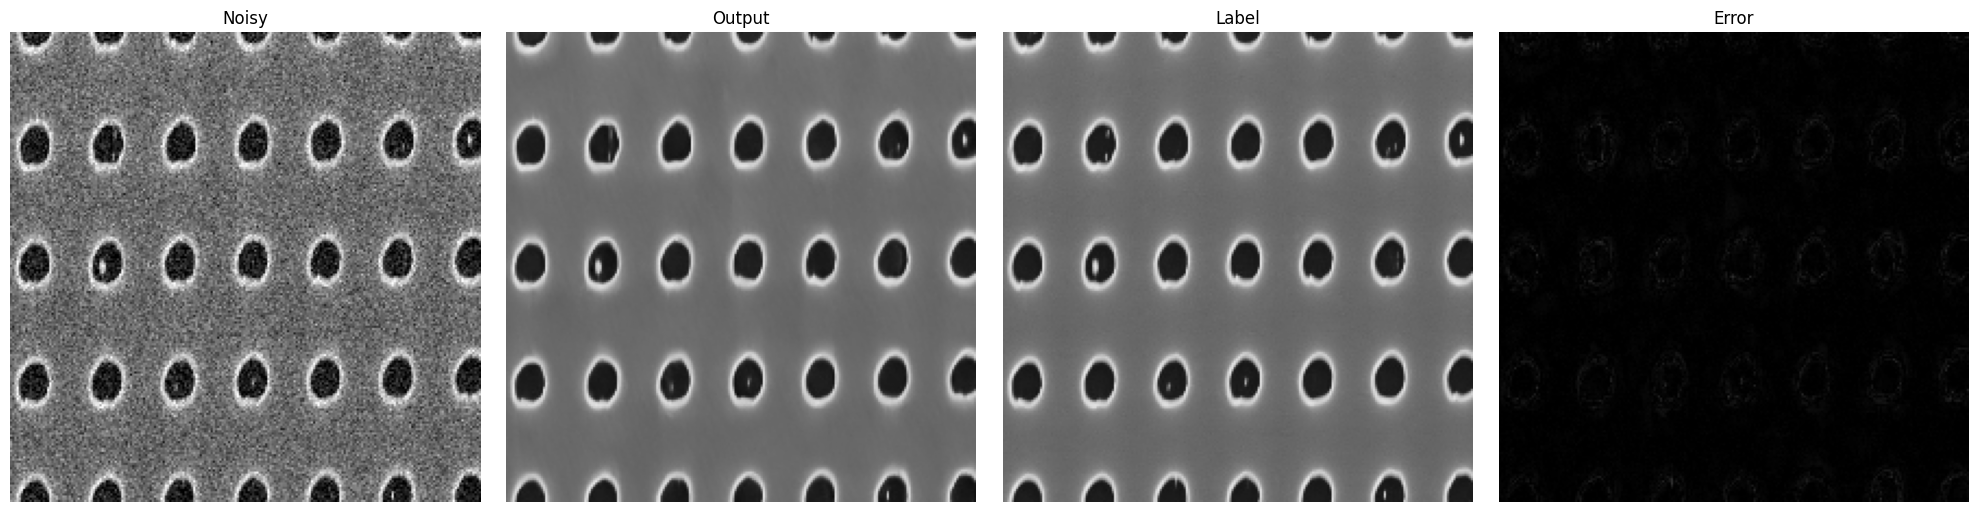

In [26]:
idx += 1
print(idx)

res_mat = loadmat(res_files[idx])
noisy = res_mat["noisy"].squeeze()
output = res_mat["output"].squeeze()
label = res_mat["label"].squeeze()

x1, x2, y1, y2 = 20, -20, 20, -20

vmax = np.percentile(label, 98) * 1.2
vmin = 0
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(noisy[x1:x2, y1:y2], cmap="gray", vmin=vmin, vmax=vmax)
plt.title("Noisy")
plt.axis("off")
plt.subplot(1, 4, 2)
plt.imshow(output[x1:x2, y1:y2], cmap="gray", vmin=vmin, vmax=vmax)
plt.title("Output")
plt.axis("off")
plt.subplot(1, 4, 3)
plt.imshow(label[x1:x2, y1:y2], cmap="gray", vmin=vmin, vmax=vmax)
plt.title("Label")
plt.axis("off")
plt.subplot(1, 4, 4)
plt.imshow(
    np.abs(output[x1:x2, y1:y2] - label[x1:x2, y1:y2]), cmap="gray", vmin=0, vmax=vmax
)
plt.title("Error")
plt.axis("off")
plt.tight_layout()
plt.show()

## Denoising using mean filter

In [28]:
subprocess.run(
    f"export DATA_ROOT={ROOT / 'dataset'} && "
    f"export RUN_DIR={ROOT / 'logs_denoising'} && "
    f"export CHECKPOINT_DIR={ROOT / 'code_denoising/checkpoint_best.ckpt'} && "
    f"python {ROOT}/code_denoising/test.py --gpu 0 --model_type mean_filter",
    shell=True,
)

2025-08-14 14:23:01 [INFO] ####################################################################################################
2025-08-14 14:23:01 [INFO] Run dir: /mnt/d/list/samsung_DS/2025_summer/실습프로젝트/logs_denoising/00018_test
2025-08-14 14:23:01 [INFO] ####################################################################################################
2025-08-14 14:23:01 [INFO] Text Config
2025-08-14 14:23:01 [INFO] trained_checkpoints:/mnt/d/list/samsung_DS/2025_summer/실습프로젝트/code_denoising/checkpoint_best.ckpt
2025-08-14 14:23:01 [INFO] test_dataset:['/mnt/d/list/samsung_DS/2025_summer/실습프로젝트/dataset/test']
2025-08-14 14:23:01 [INFO] data_type:*.npy
2025-08-14 14:23:01 [INFO] log_lv:INFO
2025-08-14 14:23:01 [INFO] run_dir:/mnt/d/list/samsung_DS/2025_summer/실습프로젝트/logs_denoising
2025-08-14 14:23:01 [INFO] init_time:1755148980.9952822
2025-08-14 14:23:01 [INFO] model_type:mean_filter
2025-08-14 14:23:01 [INFO] gpu:0
2025-08-14 14:23:01 [INFO] valid_batch:8
2025-08-14 14:23:01 [IN

CompletedProcess(args='export DATA_ROOT=/mnt/d/list/samsung_DS/2025_summer/실습프로젝트/dataset && export RUN_DIR=/mnt/d/list/samsung_DS/2025_summer/실습프로젝트/logs_denoising && export CHECKPOINT_DIR=/mnt/d/list/samsung_DS/2025_summer/실습프로젝트/code_denoising/checkpoint_best.ckpt && python /mnt/d/list/samsung_DS/2025_summer/실습프로젝트/code_denoising/test.py --gpu 0 --model_type mean_filter', returncode=0)

In [29]:
run_idx = 18
log_root = ROOT / f"logs_denoising/{run_idx:05d}_test/test"
res_files = sorted(log_root.glob("*.mat"))
print(f"Found {len(res_files)} result files in {log_root}")

Found 100 result files in /mnt/d/list/samsung_DS/2025_summer/실습프로젝트/logs_denoising/00018_test/test


In [30]:
idx = 0

1


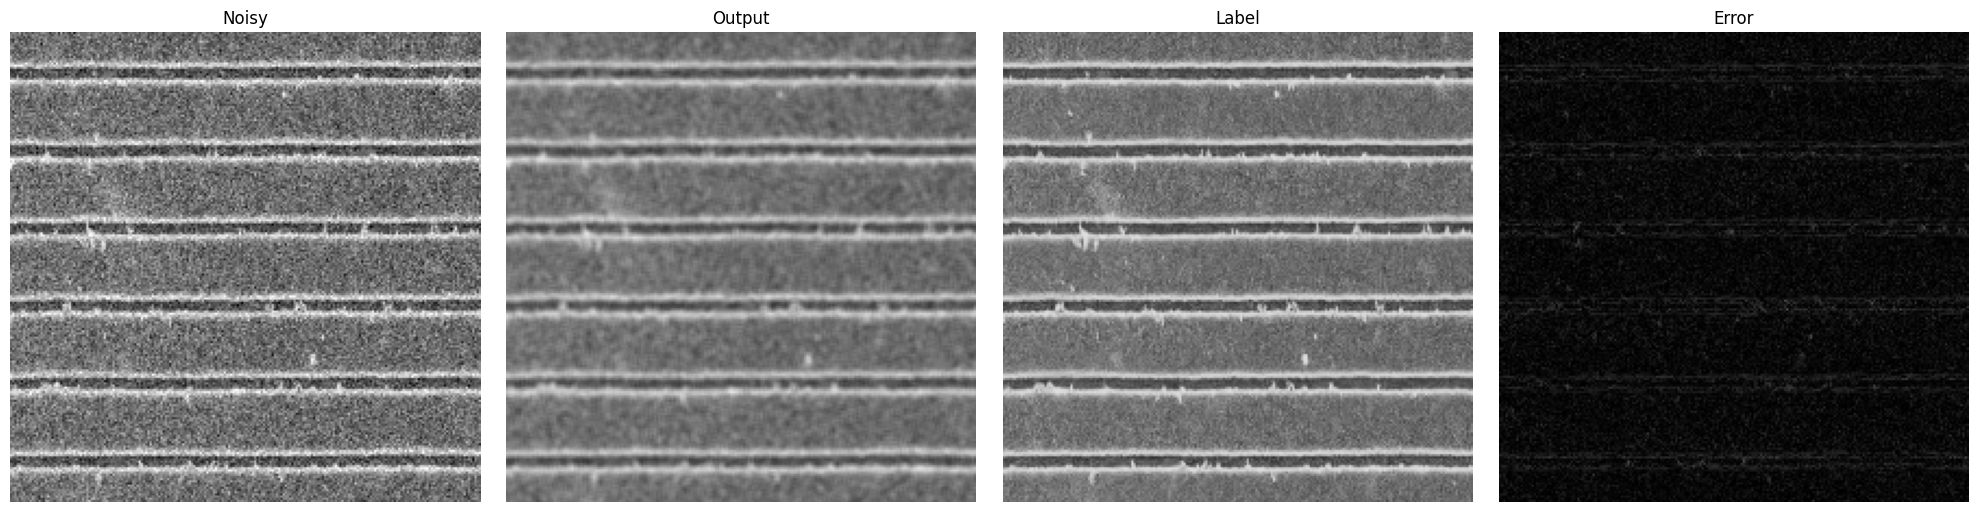

In [31]:
idx += 1
print(idx)

res_mat = loadmat(res_files[idx])
noisy = res_mat["noisy"].squeeze()
output = res_mat["output"].squeeze()
label = res_mat["label"].squeeze()

x1, x2, y1, y2 = 20, -20, 20, -20

vmax = np.percentile(label, 98) * 1.2
vmin = 0
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(noisy[x1:x2, y1:y2], cmap="gray", vmin=vmin, vmax=vmax)
plt.title("Noisy")
plt.axis("off")
plt.subplot(1, 4, 2)
plt.imshow(output[x1:x2, y1:y2], cmap="gray", vmin=vmin, vmax=vmax)
plt.title("Output")
plt.axis("off")
plt.subplot(1, 4, 3)
plt.imshow(label[x1:x2, y1:y2], cmap="gray", vmin=vmin, vmax=vmax)
plt.title("Label")
plt.axis("off")
plt.subplot(1, 4, 4)
plt.imshow(
    np.abs(output[x1:x2, y1:y2] - label[x1:x2, y1:y2]), cmap="gray", vmin=0, vmax=vmax
)
plt.title("Error")
plt.axis("off")
plt.tight_layout()
plt.show()

## Denoising using median filter

In [32]:
subprocess.run(
    f"export DATA_ROOT={ROOT / 'dataset'} && "
    f"export RUN_DIR={ROOT / 'logs_denoising'} && "
    f"export CHECKPOINT_DIR={ROOT / 'code_denoising/checkpoint_best.ckpt'} && "
    f"python {ROOT}/code_denoising/test.py --gpu 0 --model_type median_filter",
    shell=True,
)

2025-08-14 14:26:03 [INFO] ####################################################################################################
2025-08-14 14:26:03 [INFO] Run dir: /mnt/d/list/samsung_DS/2025_summer/실습프로젝트/logs_denoising/00019_test
2025-08-14 14:26:03 [INFO] ####################################################################################################
2025-08-14 14:26:03 [INFO] Text Config
2025-08-14 14:26:03 [INFO] trained_checkpoints:/mnt/d/list/samsung_DS/2025_summer/실습프로젝트/code_denoising/checkpoint_best.ckpt
2025-08-14 14:26:03 [INFO] test_dataset:['/mnt/d/list/samsung_DS/2025_summer/실습프로젝트/dataset/test']
2025-08-14 14:26:03 [INFO] data_type:*.npy
2025-08-14 14:26:03 [INFO] log_lv:INFO
2025-08-14 14:26:03 [INFO] run_dir:/mnt/d/list/samsung_DS/2025_summer/실습프로젝트/logs_denoising
2025-08-14 14:26:03 [INFO] init_time:1755149163.446741
2025-08-14 14:26:03 [INFO] model_type:median_filter
2025-08-14 14:26:03 [INFO] gpu:0
2025-08-14 14:26:03 [INFO] valid_batch:8
2025-08-14 14:26:03 [I

CompletedProcess(args='export DATA_ROOT=/mnt/d/list/samsung_DS/2025_summer/실습프로젝트/dataset && export RUN_DIR=/mnt/d/list/samsung_DS/2025_summer/실습프로젝트/logs_denoising && export CHECKPOINT_DIR=/mnt/d/list/samsung_DS/2025_summer/실습프로젝트/code_denoising/checkpoint_best.ckpt && python /mnt/d/list/samsung_DS/2025_summer/실습프로젝트/code_denoising/test.py --gpu 0 --model_type median_filter', returncode=0)

In [33]:
run_idx = 19
log_root = ROOT / f"logs_denoising/{run_idx:05d}_test/test"
res_files = sorted(log_root.glob("*.mat"))
print(f"Found {len(res_files)} result files in {log_root}")

Found 100 result files in /mnt/d/list/samsung_DS/2025_summer/실습프로젝트/logs_denoising/00019_test/test


In [34]:
idx = 0

4


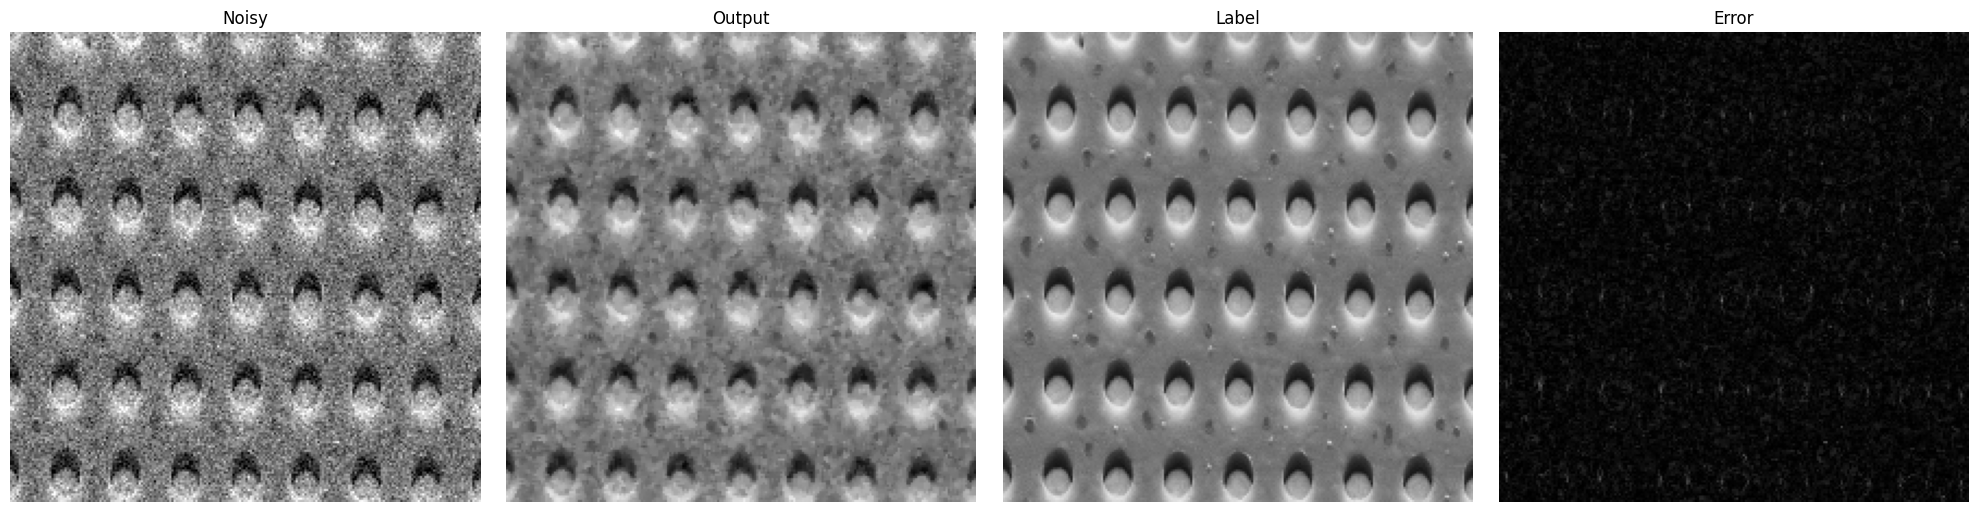

In [38]:
idx += 1
print(idx)

res_mat = loadmat(res_files[idx])
noisy = res_mat["noisy"].squeeze()
output = res_mat["output"].squeeze()
label = res_mat["label"].squeeze()

x1, x2, y1, y2 = 20, -20, 20, -20

vmax = np.percentile(label, 98) * 1.2
vmin = 0
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(noisy[x1:x2, y1:y2], cmap="gray", vmin=vmin, vmax=vmax)
plt.title("Noisy")
plt.axis("off")
plt.subplot(1, 4, 2)
plt.imshow(output[x1:x2, y1:y2], cmap="gray", vmin=vmin, vmax=vmax)
plt.title("Output")
plt.axis("off")
plt.subplot(1, 4, 3)
plt.imshow(label[x1:x2, y1:y2], cmap="gray", vmin=vmin, vmax=vmax)
plt.title("Label")
plt.axis("off")
plt.subplot(1, 4, 4)
plt.imshow(
    np.abs(output[x1:x2, y1:y2] - label[x1:x2, y1:y2]), cmap="gray", vmin=0, vmax=vmax
)
plt.title("Error")
plt.axis("off")
plt.tight_layout()
plt.show()